# COSC311 - Lab 2
### JJ McCauley

In [11]:
''' --- Imports --- '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Formatting graphs

## Task 1

In [25]:
b_df = pd.read_csv("Bejaia_Region.csv")  # Bejaia Region Dataset
print(b_df)
# Display the Bejaia Region Dataset Info & Statistics
print(b_df.info())
print(b_df.describe())
print("Unique Values of Wind Speed: ", b_df['Ws'].unique())
print("Sample Count: ", b_df['day'].count())

     day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0      1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1      2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2      3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3      4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4      5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...  ...   ...  ...  ...   
117   26      9  2012           31  54  11   0.0  82.0  6.0  16.3  2.5  6.2   
118   27      9  2012           31  66  11   0.0  85.7  8.3  24.9  4.0  9.0   
119   28      9  2012           32  47  14   0.7  77.5  7.1   8.8  1.8  6.8   
120   29      9  2012           26  80  16   1.8  47.4  2.9   7.7  0.3  3.0   
121   30      9  2012           25  78  14   1.4  45.0  1.9   7.5  0.2  2.4   

     FWI    Classes    
0    0.5  not fire     
1  

In [13]:
s_df = pd.read_csv("Sidi-Bel_Abbes_Region.csv")  # Sidi-Bel Abbes Region Update
# Display the Sidi-Bel Abbes Region Dataset Info & Statistics
print(s_df.info())
print(s_df.describe())
print("Unique Values of Wind Speed: ", s_df['Ws'].unique())
print("Sample Count: ", s_df['day'].count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4   RH           122 non-null    int64  
 5   Ws           122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB
None
              day       month    year  Temperature          RH          Ws  \
count  122.000000  122.000000   122.0   122.000000  122.000000  122.000000   

## Task 2

<Axes: title={'center': 'Temperature over Time'}, xlabel='Date', ylabel='Temperature'>

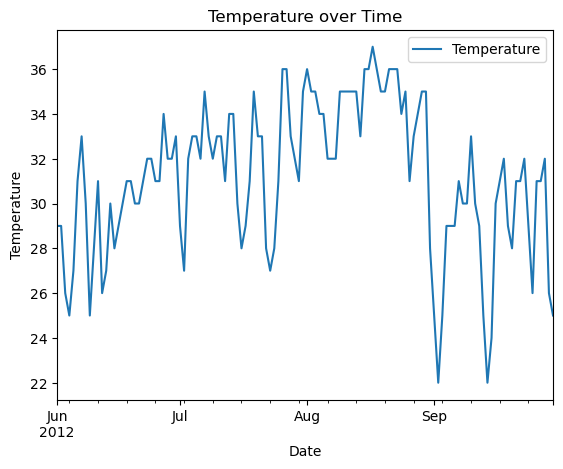

In [26]:
b_df['Date'] = pd.to_datetime(b_df[['year', 'month', 'day']])  # Creating new column for date
b_df.plot.line(x='Date', y='Temperature', title='Temperature over Time', ylabel='Temperature')

## Task 3

<Axes: title={'center': 'Relation between Temperature and FWI'}, xlabel='Temperature', ylabel='FWI'>

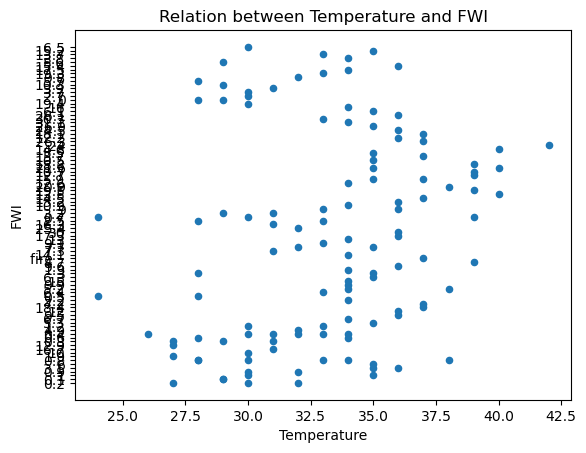

In [27]:
s_df.plot.scatter(x='Temperature', y='FWI', title='Relation between Temperature and FWI')
#plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(10))
#plt.show()

## Task 4

month
6    70.400000
7    69.580645
8    62.000000
9    70.066667
Name: RH, dtype: float64


Text(0, 0.5, 'Average RH')

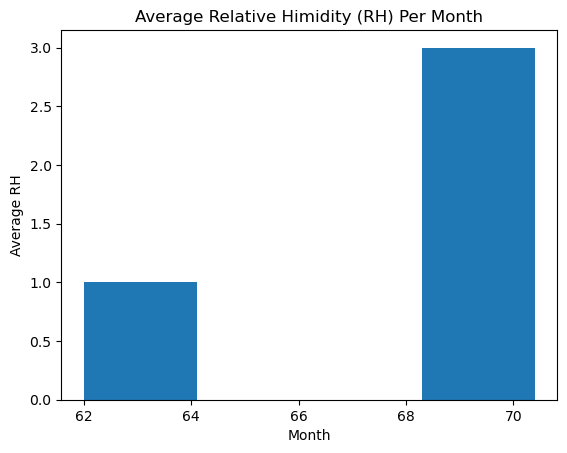

In [38]:
avg_RH_per_month = b_df.groupby('month')['RH'].mean()
print(avg_RH_per_month)
# ASK: Is this the best type of graph? Bar might be better, since this is 
# analyzing averages
avg_RH_per_month.plot(kind='hist', bins=avg_RH_per_month.size)
plt.title('Average Relative Himidity (RH) Per Month')
plt.xlabel('Month')
plt.ylabel('Average RH')

## Task 5